\author{Nilava Metya}

# Problem
Define the dissimilarity between two observations, xi and xi′ , with p-dimensional attributes/inputs/features
as the following: $$D(x_{i},x_{i'}) = \sum_{j=1}^p w_jd_j\left(x_{ij},x_{i'j}\right)$$ where the weights $w_j$ satisfy $\sum_{j=1}^p w_j=1$ and $d_j\left(x_i,x_{i'}\right) = \left(x_{ij}-x_{i'j}\right)^2$ is the squared error distance. Assume there are n observations. How to specify the weights wj so that each attribute has equal influence? Please explain your reasons and provide detailed derivations.

## Solution
The (relative) influence of an attribute is determined by its contribution to the average dissimiliarity. The average dissimilarity is given by $$\overline D = \frac{1}{n^2}\sum_{1\leq i,i'\leq n} D(x_i,x_{i'}) = \frac{1}{n^2}\sum_{1\leq i,i'\leq n}\sum_{j=1}^p w_jd_j\left(x_{ij},x_{i'j}\right) = \sum_{j=1}^p w_j \left(\frac{1}{n^2}\sum_{1\leq i,i'\leq n}d_j\left(x_{ij},x_{i'j}\right)\right) = \sum_{j=1}^p w_j\overline{d_j}$$ where $\displaystyle \overline{d_j} = \frac{1}{n^2}\sum_{1\leq i,i'\leq n}d_j\left(x_{ij},x_{i'j}\right)$. So the influence of the $j^{\text{th}}$ variable is given by $w_j\overline{d_j}$. To have equal influence means to have all $w_j\overline{d_j}$ equal. So we simply choose $\displaystyle w_j = \frac{1/\overline{d_j}}{\sum_{i=1}^p \frac{1}{\overline{d_i}}}$. The denominator is simply a normalizing factor to make $\sum_{j=1}^p w_j=1$. 

Now we compute $\overline{d_j}$ in our case. Clearly $\displaystyle \overline{d_j} = \frac{1}{n^2}\sum_{1\leq i,i'\leq n}d_j\left(x_{ij},x_{i'j}\right) = \frac{1}{n^2}\sum_{1\leq i,i'\leq n} \left(x_{ij}-x_{i'j}\right)^2$. Now note that $\frac{1}{n^2}\sum_{1\leq i,i'\leq n} \left(X_{i}-X_{i'}\right)^2 = \frac{1}{n^2}\sum_{i,i'}X_i^2 + \frac{1}{n^2}\sum_{i,i'}X_{i'}^2 - \frac{1}{n^2}\sum_{i,i'}2X_iX_{i'} = 2\left[\frac{1}{n}\sum_i X_i^2 - \left(\frac{1}{n}\sum_iX_i\right)^2\right] = 2 (E(X^2) - E(X)^2) = 2\sigma_X^2$ where $\sigma_X$ is the standard deviation. Thus it stands that $\overline{d_j} = 2\sigma_j^2$ where $\sigma_j$ is the standard deviation of the $j^{\text{th}}$ attribute. Therefore we want the weights to be $\displaystyle w_j = \frac{\sigma_j^{-2}}{\sum_{i=1}^p \frac{1}{\sigma_i^2}}$.

\newpage
# Problem
\textit{Download the Iris data (you can use data(iris) in \texttt{R}).}
\begin{enumerate}
\item The output is “species” which has three values and there are in total $150$ observations. The objective
is to predict “species” using the four covariates. Please compare the performance of the following
three commonly used classifies: (a) LDA, (b) logistic regression, (c) nearest neighbors. Summarize
your results.
\item Remove the output “species” from the data and apply the $k-$means clustering. Compare the clustering
results to the true group defined by species and summarize the results.
\item If the number of species is unknown in (2), can you recommend a method to estimate it. Describe
the idea and the algorithm (not necessary to produce results).
\item {[Bonus]} Compare the performance of (2) with another clustering method.
\end{enumerate}

Let's import the data and divide it into training and testing data. The data comprises $150$ observations, out of which we take $90$ of those to be training data and the other $60$ to be testing data.

In [1]:
set.seed(-459091842)
data = iris

#pick some training data
train_rows = sample(nrow(data), replace = FALSE, 90)
ir.train = data[train_rows,]
x.train = ir.train[,c(1:4)]
y.train = ir.train[,c(5)]

#the rest are testing data
ir.test = data[-train_rows,]
x.test = ir.test[,c(1:4)]
y.test = ir.test[,c(5)]

Let's start with **Linear Discriminant Analysis**. There are three \texttt{Species}: \texttt{setosa}, \texttt{versicolor} and \texttt{virginica}.

In [2]:
library(MASS) #needed for LDA
ir.lda = lda(Species ~ Petal.Width + Petal.Length + Sepal.Width + Sepal.Length, data = ir.train)
ir.lda

Call:
lda(Species ~ Petal.Width + Petal.Length + Sepal.Width + Sepal.Length, 
    data = ir.train)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3555556  0.3111111  0.3333333 

Group means:
           Petal.Width Petal.Length Sepal.Width Sepal.Length
setosa        0.253125     1.443750    3.409375     5.003125
versicolor    1.364286     4.335714    2.814286     6.053571
virginica     2.103333     5.600000    2.993333     6.673333

Coefficients of linear discriminants:
                    LD1        LD2
Petal.Width  -2.9638172 -3.9018805
Petal.Length -2.0092156  1.7192566
Sepal.Width   1.4715672 -1.4279477
Sepal.Length  0.6446696 -0.4880036

Proportion of trace:
   LD1    LD2 
0.9914 0.0086 

Now that we have fit the LDA model, we do the predictions and find the testing and training error.

In [3]:
ir.lda.predict.test = predict(ir.lda, x.test)
ir.lda.error.test = mean(ir.lda.predict.test$class != y.test)
cat("testing error:", ir.lda.error.test,"\n")

ir.lda.predict.train = predict(ir.lda, x.train)
ir.lda.error.train = mean(ir.lda.predict.train$class != y.train)
cat("training error:", ir.lda.error.train)

testing error: 0.03333333 
training error: 0.02222222

\newline
We do **Logistic Regression** now. There are three \texttt{Species}: \texttt{setosa}, \texttt{versicolor} and \texttt{virginica}. Since logistic regression only works for binary classification, we have to use a modified procedure. Luckily the \texttt{vglm()} function in the \texttt{VGAM} package handles this.

Before that, let's first reduce the number of covariates.

In [4]:
not_setosa = which(data[,c(5)] != "setosa")
ir_restricted = data[not_setosa,]
model.lr = glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,data = ir_restricted, family = "binomial")
summary(model.lr)


Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = "binomial", data = ir_restricted)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)   -42.638     25.707  -1.659   0.0972 .
Sepal.Width    -6.681      4.480  -1.491   0.1359  
Sepal.Length   -2.465      2.394  -1.030   0.3032  
Petal.Width    18.286      9.743   1.877   0.0605 .
Petal.Length    9.429      4.737   1.991   0.0465 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  11.899  on 95  degrees of freedom
AIC: 21.899

Number of Fisher Scoring iterations: 10


There's no warning which means that that the data \texttt{versicolor} and \texttt{virginica} are not well-separated.

In [5]:
not_versicolor = which(data[,c(5)] != "versicolor")
ir_restricted = data[not_versicolor,]
model.lr = glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,data = ir_restricted, family = "binomial")
summary(model.lr)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = "binomial", data = ir_restricted)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)     -15.168 560540.412       0        1
Sepal.Width      -4.172  94374.304       0        1
Sepal.Length     -3.961 143416.970       0        1
Petal.Width       9.736 169967.550       0        1
Petal.Length     11.975  88570.514       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+02  on 99  degrees of freedom
Residual deviance: 8.5827e-10  on 95  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


The warning message indicated that the data for \texttt{setosa} and \texttt{virginica} are not well-separated.

In [6]:
not_virginica = which(data[,c(5)] != "virginica")
ir_restricted = data[not_virginica,]
model.lr = glm(Species ~ Sepal.Width + Sepal.Length + Petal.Width + Petal.Length,data = ir_restricted, family = "binomial")
summary(model.lr)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Species ~ Sepal.Width + Sepal.Length + Petal.Width + 
    Petal.Length, family = "binomial", data = ir_restricted)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)
(Intercept)       6.556 601950.323       0        1
Sepal.Width      -7.418  92924.451       0        1
Sepal.Length     -9.879 194223.245       0        1
Petal.Width      25.033 216058.936       0        1
Petal.Length     19.054 144515.981       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3863e+02  on 99  degrees of freedom
Residual deviance: 1.3166e-09  on 95  degrees of freedom
AIC: 10

Number of Fisher Scoring iterations: 25


The warning message indicated that the data for \texttt{setosa} and \texttt{versicolor} are not well-separated.

\\
Looking at the summary for the logistic regression model fitted for \texttt{versicolor} vs \texttt{virginica}, we discard the coviriates \texttt{Sepal.Width} and \texttt{Sepal.Length} because they have the highest $P(>|z|)$ values.

\\
Now we are ready to fit the model on training data based on these two covariates.

In [7]:
library(VGAM)
ir.lr = vglm(Species ~ Petal.Width + Petal.Length, data = ir.train, family = multinomial)
summary(ir.lr)

Loading required package: stats4

Loading required package: splines

Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“1 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“7 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“13 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“20 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = trace, wzepsilon = control$wzepsilon):
“24 diagonal elements of the working weights variable 'wz' have been replaced by 1.819e-12”
Warning message in checkwz(wz, M = M, trace = tr


Call:
vglm(formula = Species ~ Petal.Width + Petal.Length, family = multinomial, 
    data = ir.train)

Coefficients: 
                Estimate Std. Error z value Pr(>|z|)  
(Intercept):1    140.510  35177.106      NA       NA  
(Intercept):2     82.284     42.278   1.946   0.0516 .
Petal.Width:1    -19.555  89363.128   0.000   0.9998  
Petal.Width:2     -7.126      5.598      NA       NA  
Petal.Length:1   -33.341  37257.251  -0.001   0.9993  
Petal.Length:2   -14.302      7.772  -1.840   0.0657 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Names of linear predictors: log(mu[,1]/mu[,3]), log(mu[,2]/mu[,3])

Residual deviance: 9.2879 on 174 degrees of freedom

Log-likelihood: -4.6439 on 174 degrees of freedom

Number of Fisher scoring iterations: 22 

'(Intercept):1', 'Petal.Width:2'


Reference group is level  3  of the response

The warnings above mean that the classes are easily separated, which is why MLE doesn't exist.

In [8]:
colnames(ir.test)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

First we note above that \texttt{Petal.Length} and \texttt{Petal.Width} correspond to columns $3$ and $4$ respectively. Now we are ready to predict using this model. 

In [9]:
ir.lr.predict.test = predict(ir.lr, ir.test[, c(3, 4)], type = "response")
cl = apply(ir.lr.predict.test, 1, which.max)
cl[cl == 1] = "setosa"
cl[cl == 2] = "versicolor"
cl[cl == 3] = "virginica"
ir.lr.error.test = mean(y.test != data.frame(cl)[,c(1)])
cat("testing error:", ir.lr.error.test,"\n")

ir.lr.predict.train = predict(ir.lr, ir.train[, c(3, 4)], type = "response")
cl = apply(ir.lr.predict.train, 1, which.max)
cl[cl == 1] = "setosa"
cl[cl == 2] = "versicolor"
cl[cl == 3] = "virginica"
ir.lr.error.train = mean(y.train != data.frame(cl)[,c(1)])
cat("training error:", ir.lr.error.train)

testing error: 0.05 
training error: 0.03333333

\newline
Now we come to $k$**-nearest neighbours**.

In [10]:
library(class)
k = c(1:20)
ir.knn.error.test = numeric(length(k)) #initializing vector for testing errors
ir.knn.error.train = numeric(length(k)) #initializing vector for training errors
for (i in k) {
  ir.knn.predict.test = knn(x.train, x.test, y.train, k[i])
  ir.knn.predict.train = knn(x.train, x.train, y.train, k[i])
  ir.knn.error.test[i] = mean(ir.knn.predict.test != y.test)
  ir.knn.error.train[i] = mean(ir.knn.predict.train != y.train)
}
data.frame(k,ir.knn.error.test,ir.knn.error.train)

k,ir.knn.error.test,ir.knn.error.train
<int>,<dbl>,<dbl>
1,0.03333333,0.00000000
2,0.03333333,0.01111111
3,0.05000000,0.03333333
4,0.05000000,0.04444444
5,0.05000000,0.03333333
6,0.06666667,0.03333333
7,0.06666667,0.02222222
8,0.08333333,0.02222222
9,0.08333333,0.01111111


Let's summarize the training and testing errors. 

In [14]:
error = matrix(c(ir.lda.error.test, ir.lr.error.test, ir.knn.error.test, ir.lda.error.train, ir.lr.error.train, ir.knn.error.train), ncol = 2)
colnames(error) = c("Test Error(%)", "Train Error(%)")
rownames(error) = c("Linear Discriminant Analysis", "Logistic Regression", paste("inbuilt k-NN with k =", k))
print(error)

                             Test Error(%) Train Error(%)
Linear Discriminant Analysis    0.03333333     0.02222222
Logistic Regression             0.05000000     0.03333333
inbuilt k-NN with k = 1         0.03333333     0.00000000
inbuilt k-NN with k = 2         0.03333333     0.01111111
inbuilt k-NN with k = 3         0.05000000     0.03333333
inbuilt k-NN with k = 4         0.05000000     0.04444444
inbuilt k-NN with k = 5         0.05000000     0.03333333
inbuilt k-NN with k = 6         0.06666667     0.03333333
inbuilt k-NN with k = 7         0.06666667     0.02222222
inbuilt k-NN with k = 8         0.08333333     0.02222222
inbuilt k-NN with k = 9         0.08333333     0.01111111
inbuilt k-NN with k = 10        0.05000000     0.02222222
inbuilt k-NN with k = 11        0.05000000     0.02222222
inbuilt k-NN with k = 12        0.06666667     0.03333333
inbuilt k-NN with k = 13        0.08333333     0.04444444
inbuilt k-NN with k = 14        0.08333333     0.04444444
inbuilt k-NN w

Here's plot for the testing errors for each of these.

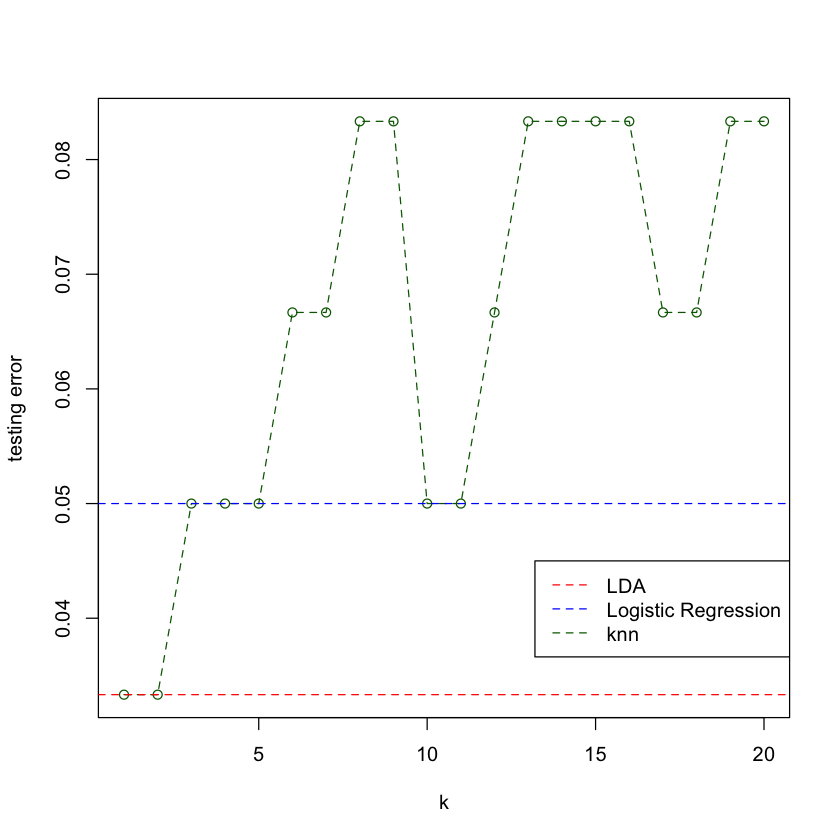

In [17]:
y.lim = c(min(c(ir.knn.error.test, ir.lr.error.test, ir.lda.error.test)), max(c(ir.knn.error.test, ir.lr.error.test, ir.lda.error.test)))
plot(k,ir.knn.error.test, type = 'o', lty = 2, ylim = y.lim, col = "dark green", ylab = "testing error")
abline(h = ir.lr.error.test, col = "blue", lty = 2, cex = 2)
abline(h = ir.lda.error.test, col = "red", lty = 2, cex = 2)
legend(13.2, 0.045, legend = c("LDA", "Logistic Regression","knn"), col = c("red", "blue", "dark green"), lty = c(2,2,2), cex = 1)

Now let's plot the training errors for each of these.

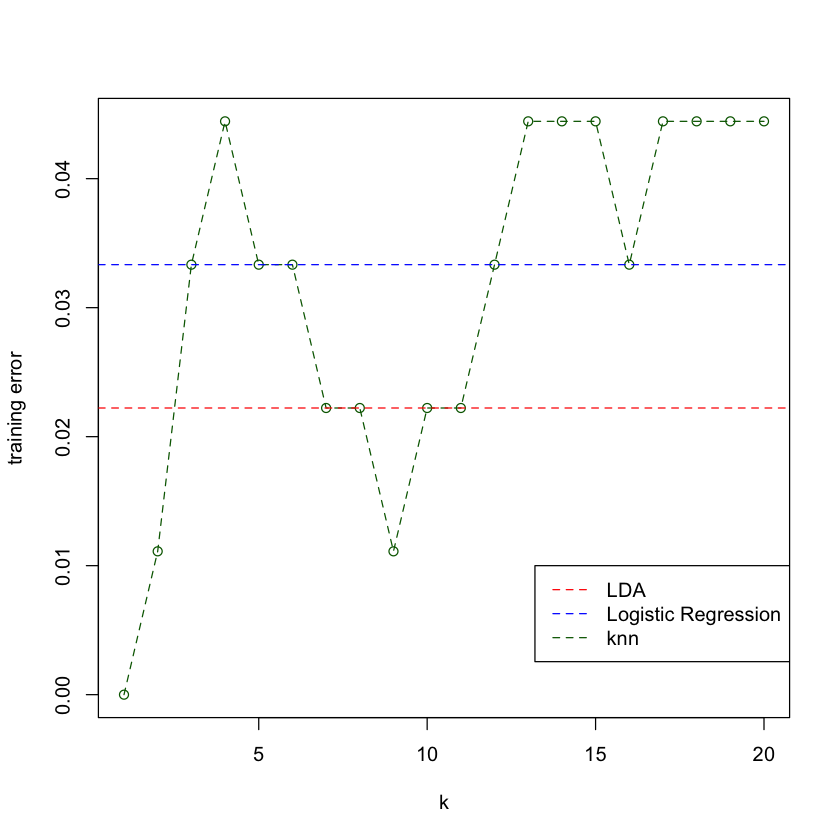

In [16]:
y.lim = c(min(c(ir.knn.error.train, ir.lr.error.train, ir.lda.error.train)), max(c(ir.knn.error.train, ir.lr.error.train, ir.lda.error.train)))
plot(k,ir.knn.error.train, type = 'o', lty = 2, ylim = y.lim, col = "dark green", ylab = "training error")
abline(h = ir.lr.error.train, col = "blue", lty = 2, cex = 2)
abline(h = ir.lda.error.train, col = "red", lty = 2, cex = 2)
legend(13.2, 0.01, legend = c("LDA", "Logistic Regression","knn"), col = c("red", "blue", "dark green"), lty = c(2,2,2), cex = 1)

Now we move to $(b)$. This is $k-$means clustering by just using the $X$ from our data.

In [171]:
ir.x = data[,c(1:4)]
ir.y = data[,5]
ir.km = kmeans(ir.x, 3, nstart = 25)$cluster
dummy = rep("a", length(ir.km))
error = c()
min_err = 2
min_err.index = c(0,0,0)
answer = c()
for (i in 1:3){
    for (j in 1:3){
        for (p in 1:3){
            if (i==j | j==p | p==i) next
            dummy[ir.km == i] = "setosa"
            dummy[ir.km == j] = "versicolor"
            dummy[ir.km == p] = "virginica"
            e = mean(dummy != ir.y)
            error = append(error, e)
            if(e < min_err){
                min_err = e
                min_err.index = c(i,j,p)
                answer = dummy
            }
        }
    }
}
cat("Error:",min_err*100,"%\n")
d = cbind(data[which(answer != ir.y),],answer[which(answer != ir.y)])
colnames(d) = c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Actual Species", "Predicted Species")
cat("The incorrect predictions:\n")
d

Error: 10.66667 %
The incorrect predictions:


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Actual Species,Predicted Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
53,6.9,3.1,4.9,1.5,versicolor,virginica
78,6.7,3.0,5.0,1.7,versicolor,virginica
102,5.8,2.7,5.1,1.9,virginica,versicolor
107,4.9,2.5,4.5,1.7,virginica,versicolor
114,5.7,2.5,5.0,2.0,virginica,versicolor
115,5.8,2.8,5.1,2.4,virginica,versicolor
120,6.0,2.2,5.0,1.5,virginica,versicolor
122,5.6,2.8,4.9,2.0,virginica,versicolor
124,6.3,2.7,4.9,1.8,virginica,versicolor


$(c)$ For this part we don't know the number of clusters and want to find it. 

One method is to do $k-$means clustering for the data for different values of $k$ and look at the total within sum of squares error. This total error will obviously decrease with increasing value of $k$, but it 'stabilizes' once the correct number of clusters is reached. We plot the graph of the total error vs. $k$. There will be a turning point, which denotes the big change in slope and that is the number of clusters we are looking for. Here's is the graph for the \texttt{iris} data.

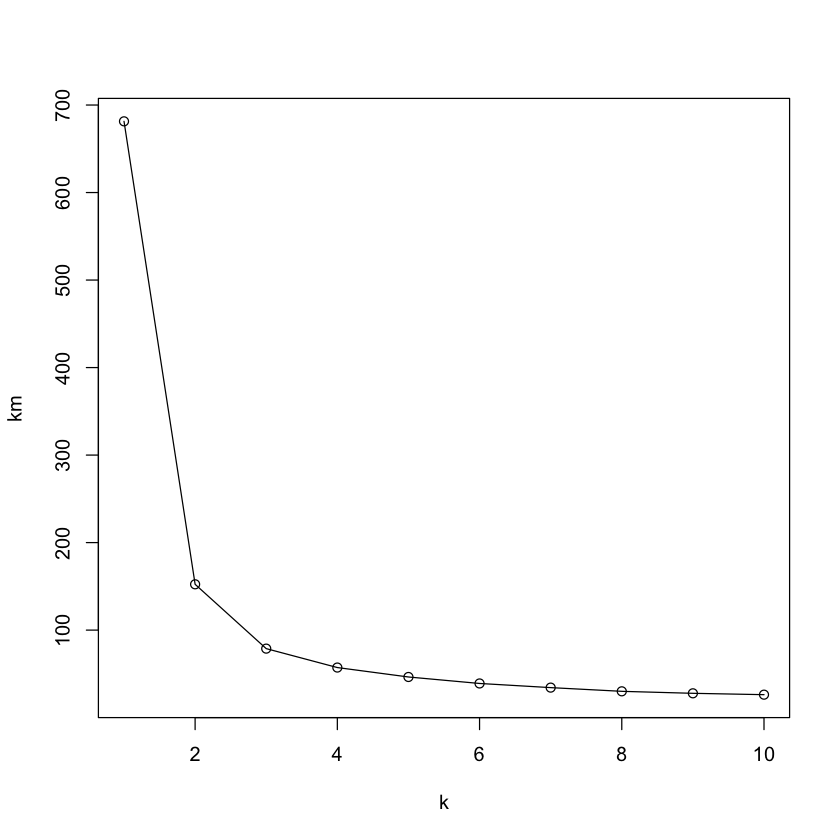

In [88]:
k = c(1:10)
km = c()
for (i in k){
    km = append(km, kmeans(ir.x, i, nstart = 25)$tot.withinss)
}
plot(km ~ k, type="o")

From this graph, we see that the big change in slope happens at $k=2$ or $k=3$. That is, the graph starts 'flattening' from $k=2$ or $k=3$.

\newline
(d) We compare $k-$means clustering with Hierarchical Clustering, assuming that we know that the number of clusters is $3$.

In [172]:
ir.hc = hclust(dist(ir.x))
#plot(ir.hc)
predict.ir.hc = cutree(ir.hc, k = 3)
#table(fit)
dummy = rep("a", length(fit))
error = c()
min_err = 2
min_err.index = c(0,0,0)
answer = c()
for (i in 1:3){
    for (j in 1:3){
        for (p in 1:3){
            if (i==j | j==p | p==i) next 
            dummy[fit == i] = "setosa"
            dummy[fit == j] = "versicolor"
            dummy[fit == p] = "virginica"
            e = mean(dummy != ir.y)
            error = append(error, e)
            if(e < min_err){
                min_err = e
                min_err.index = c(i,j,p)
                answer = dummy
            }
        }
    }
}
cat("Error:",min_err*100,"%\n")
d = cbind(data[which(answer != ir.y),],answer[which(answer != ir.y)])
colnames(d) = c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Actual Species", "Predicted Species")
cat("The incorrect predictions:\n")
d

Error: 16 %
The incorrect predictions:


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Actual Species,Predicted Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
51,7.0,3.2,4.7,1.4,versicolor,virginica
52,6.4,3.2,4.5,1.5,versicolor,virginica
53,6.9,3.1,4.9,1.5,versicolor,virginica
55,6.5,2.8,4.6,1.5,versicolor,virginica
57,6.3,3.3,4.7,1.6,versicolor,virginica
59,6.6,2.9,4.6,1.3,versicolor,virginica
64,6.1,2.9,4.7,1.4,versicolor,virginica
66,6.7,3.1,4.4,1.4,versicolor,virginica
69,6.2,2.2,4.5,1.5,versicolor,virginica


\newpage
# Problem
Analyze the wage data as a function of age by the following methods (you can use existing packages in
any programing language you are using).
\begin{enumerate}
\item Polynomial regression with degree $4$.
\item A cubic spline with knots at $25$, $40$, and $60$.
\item Smoothing spline with the smoothness level specified by cross-validation.
\item Comment on the differences of the three models and draw a conclusion.
\end{enumerate}